In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 안 깨지게 하는 코드
from matplotlib import rc
rc('font', family='Malgun Gothic') # Windows
plt.rcParams['axes.unicode_minus'] = False

#데이터셋
excel_file_path = 'C:\\Users\\rkffl\\SubwayPulse\\1.csv'

pd.read_csv(excel_file_path, encoding='cp949')
    
# pandas 설정 변경: 모든 행과 모든 열을 출력하도록 설정
pd.set_option('display.max_rows', None)     # 최대 행 수 제한 해제 (모든 행 출력)
pd.set_option('display.max_columns', None)  # 최대 열 수 제한 해제 (모든 열 출력)
pd.set_option('display.width', 1000)        # 출력 너비 설정


print("\n전체 데이터프레임 내용:")
#print(df)

"""
# 전체 데이터프레임을 새 CSV 파일로 저장하는법
# index=False는 데이터프레임의 인덱스(왼쪽의 0, 1, 2...)를 파일에 저장하지 않는다는 의미
df.to_csv('full_data_output.csv', encoding='cp949', index=False)
print("\n전체 데이터가 'full_data_output.csv' 파일로 저장되었습니다.")

"""

# '호선명'을 기준으로 그룹화하고, 각 그룹의 '승차총승객수' 합계 구하기
df_grouped_sum = df.groupby('호선명')['승차총승객수'].sum().reset_index()
df_grouped_sum2 = df.groupby('호선명')['하차총승객수'].sum().reset_index()

# 호선별 승/하차총승객수 합계를 하나의 DataFrame으로 합치기

df_total_sum = pd.merge(df_grouped_sum, df_grouped_sum2, on='호선명')

# '호선명'을 기준으로 그룹화하고, 여러 컬럼의 평균 구하기
df_grouped_avg = df.groupby('호선명')[['승차총승객수', '하차총승객수']].mean().reset_index()



#승차합
print("\n--- 호선별 승차총승객수 합계 ---")
print(df_grouped_sum)

#하차합
print("\n--- 호선별 하차총승객수 합계 ---")
print(df_grouped_sum2)


# '호선명'을 기준으로 그룹화하고, 여러 컬럼의 평균 구하기
df_grouped_avg = df.groupby('호선명')[['승차총승객수', '하차총승객수']].mean().reset_index()

print("\n--- 호선별 승하차총승객수 평균 ---")
print(df_grouped_avg)


    


전체 데이터프레임 내용:

--- 호선별 승차총승객수 합계 ---
         호선명    승차총승객수
0        1호선  10629251
1        2호선  54765473
2        3호선  21348550
3        4호선  20857359
4        5호선  25874349
5        6호선  13717355
6        7호선  22896962
7        8호선   7985021
8        9호선  11182578
9   9호선2~3단계   4561929
10       경강선   1400077
11       경부선  18311527
12       경원선   8278257
13       경의선   4471536
14       경인선  10478060
15       경춘선   1571867
16  공항철도 1호선   5278426
17       과천선   4201449
18       분당선  14393728
19       서해선    440775
20       수인선   2535501
21       신림선   1893807
22       안산선   4701714
23     우이신설선   1913302
24       일산선   4534061
25       장항선    795868
26       중앙선   3486900

--- 호선별 하차총승객수 합계 ---
         호선명    하차총승객수
0        1호선  10308170
1        2호선  55580725
2        3호선  21086667
3        4호선  21369241
4        5호선  25556813
5        6호선  13592530
6        7호선  22550387
7        8호선   8025101
8        9호선  11331638
9   9호선2~3단계   4517613
10       경강선   1342574
11       경부선  18090

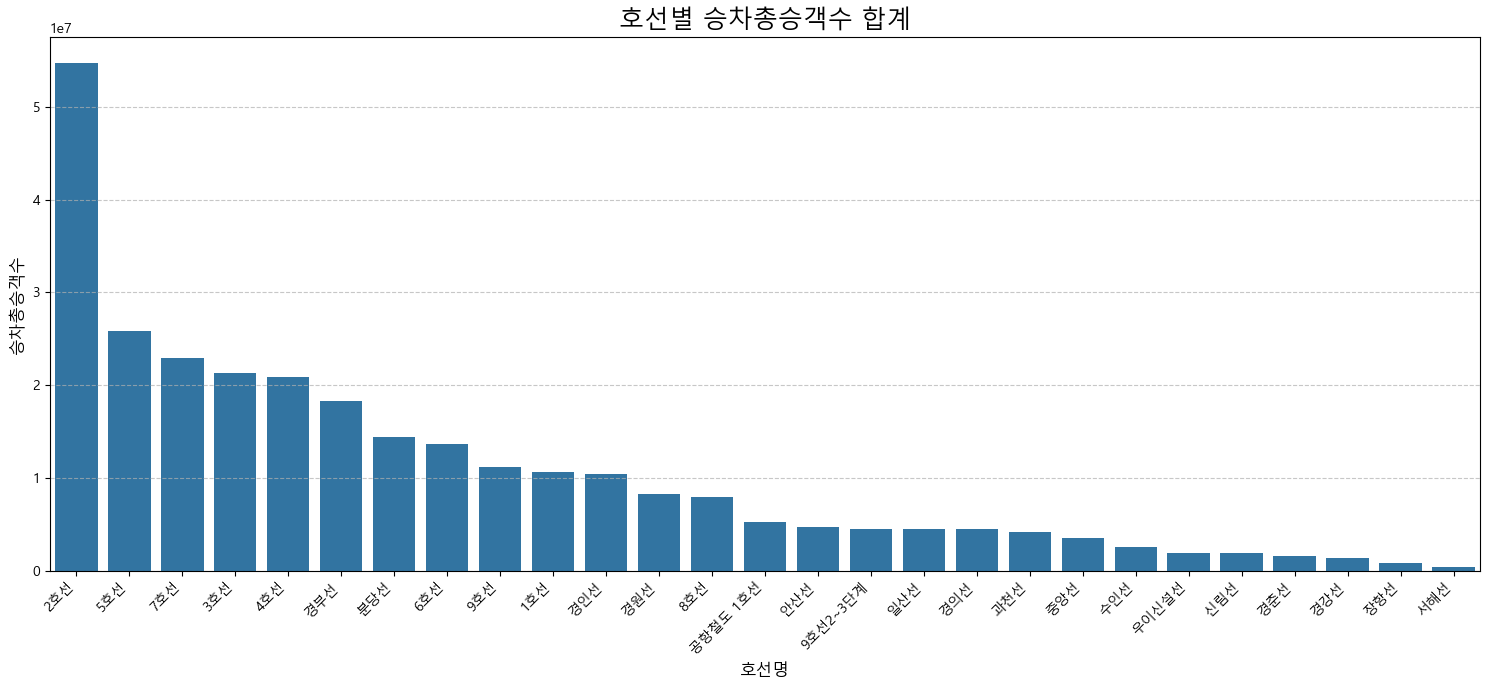

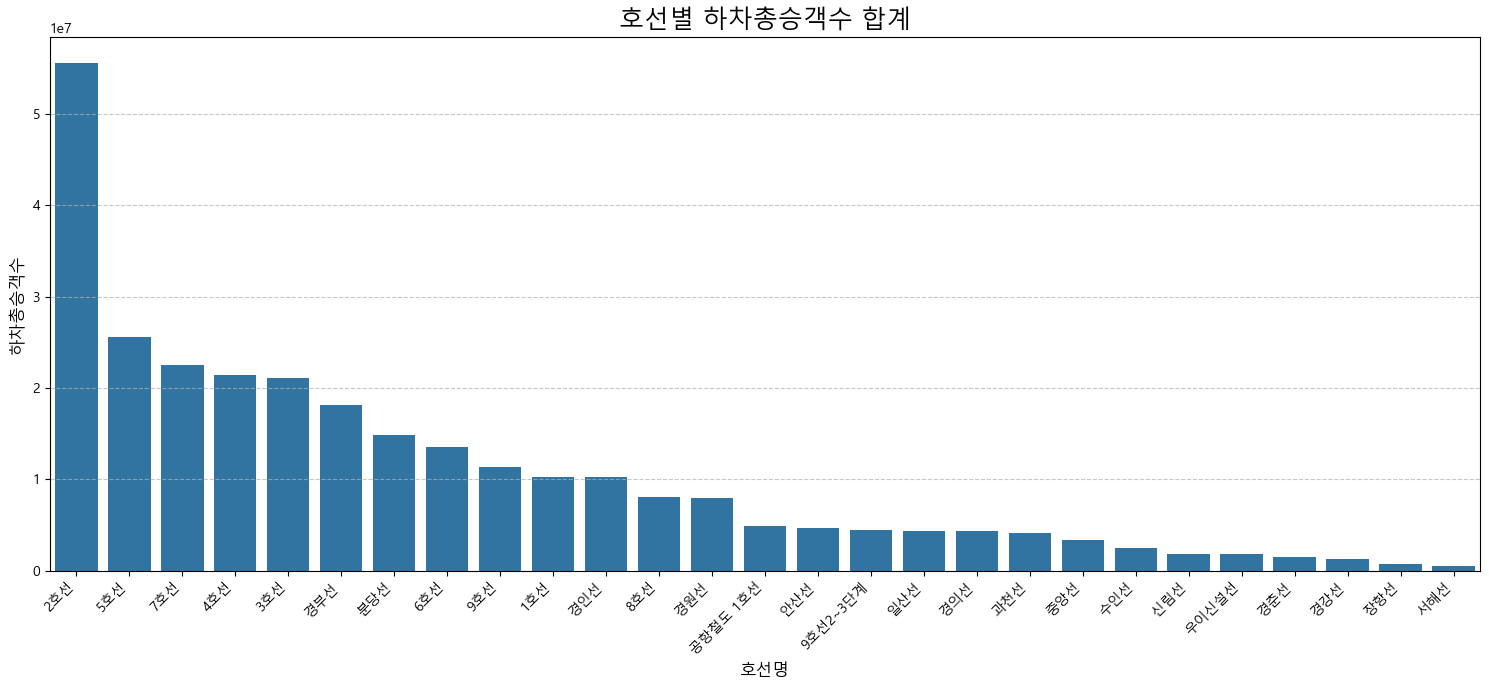

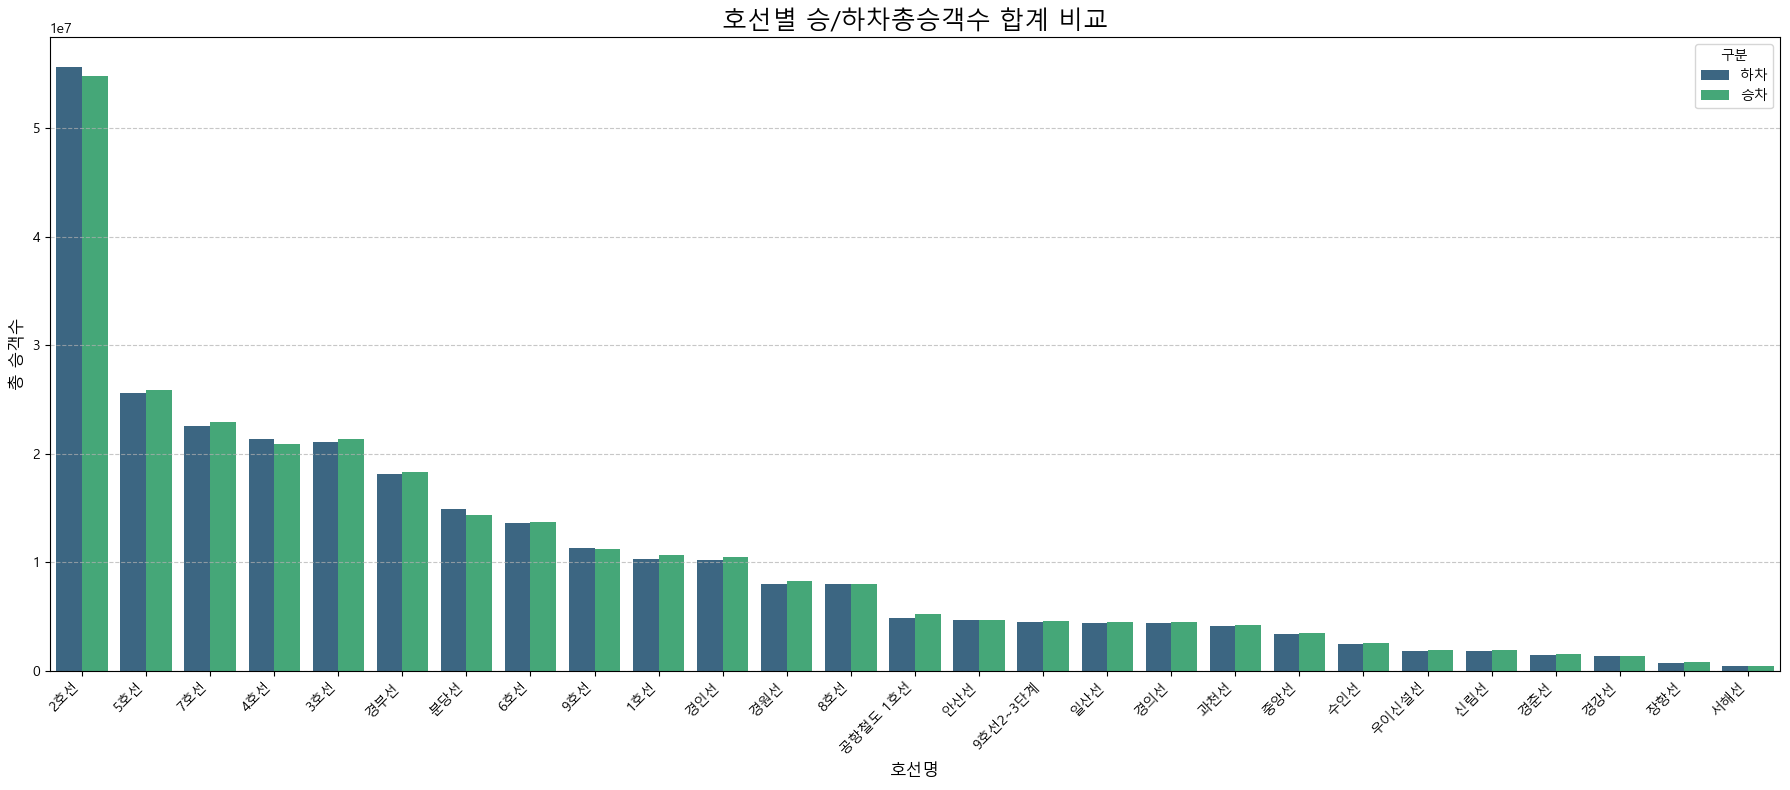

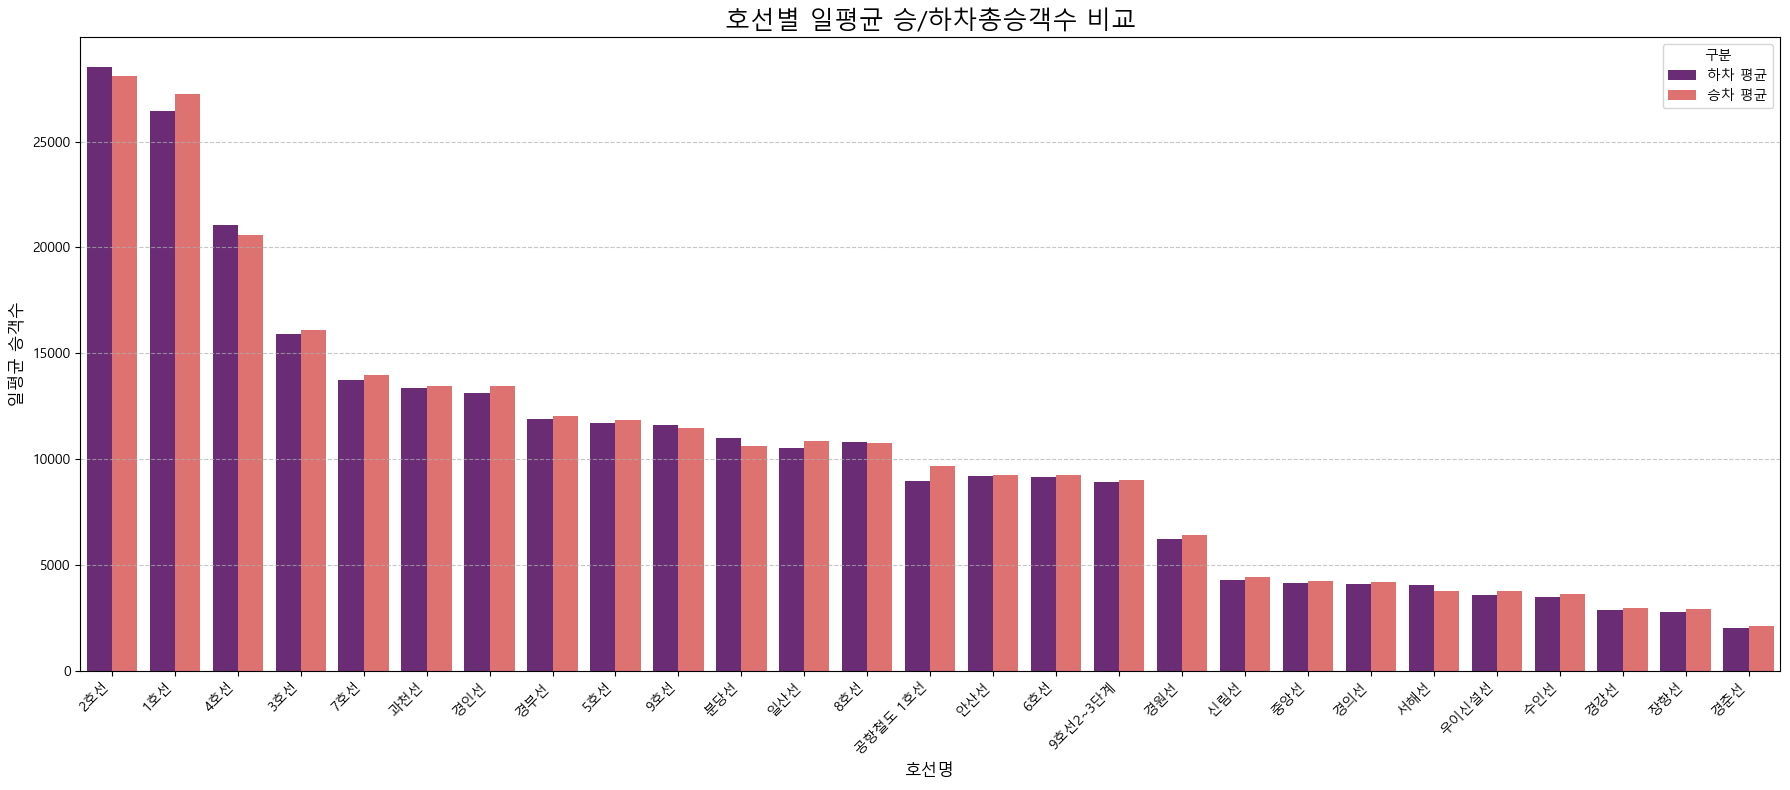

In [ ]:
#데이터 가공

# 1. 호선별 승차총승객수 합계 막대 그래프
plt.figure(figsize=(15, 7)) # 그래프 크기 설정
sns.barplot(x='호선명', y='승차총승객수', data=df_grouped_sum.sort_values(by='승차총승객수', ascending=False))
plt.title('호선별 승차총승객수 합계', fontsize=18)
plt.xlabel('호선명', fontsize=12)
plt.ylabel('승차총승객수', fontsize=12)
plt.xticks(rotation=45, ha='right') # 호선명 라벨이 겹치지 않게 회전
plt.grid(axis='y', linestyle='--', alpha=0.7) # 그리드 라인 추가
plt.tight_layout() # 그래프 요소들이 잘 보이도록 자동 조정
plt.show() # 그래프 출력

    # 2. 호선별 하차총승객수 합계 막대 그래프
plt.figure(figsize=(15, 7))
sns.barplot(x='호선명', y='하차총승객수', data=df_grouped_sum2.sort_values(by='하차총승객수', ascending=False))
plt.title('호선별 하차총승객수 합계', fontsize=18)
plt.xlabel('호선명', fontsize=12)
plt.ylabel('하차총승객수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. 호선별 승/하차총승객수 합계 비교 막대 그래프 (두 개의 막대)
# 데이터를 long format으로 변환하여 seaborn이 여러 그룹을 한 번에 그릴 수 있도록 함
df_total_sum_melted = df_total_sum.melt(id_vars='호선명', var_name='구분', value_vars=['승차총승객수', '하차총승객수'])
df_total_sum_melted['구분'] = df_total_sum_melted['구분'].replace({'승차총승객수': '승차', '하차총승객수': '하차'})

plt.figure(figsize=(18, 8))
sns.barplot(x='호선명', y='value', hue='구분', data=df_total_sum_melted.sort_values(by='value', ascending=False), palette='viridis')
plt.title('호선별 승/하차총승객수 합계 비교', fontsize=18)
plt.xlabel('호선명', fontsize=12)
plt.ylabel('총 승객수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='구분')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. 호선별 승/하차총승객수 평균 비교 막대 그래프 (두 개의 막대)
# 데이터를 long format으로 변환
df_grouped_avg_melted = df_grouped_avg.melt(id_vars='호선명', var_name='구분', value_vars=['승차총승객수', '하차총승객수'])
df_grouped_avg_melted['구분'] = df_grouped_avg_melted['구분'].replace({'승차총승객수': '승차 평균', '하차총승객수': '하차 평균'})

plt.figure(figsize=(18, 8))
sns.barplot(x='호선명', y='value', hue='구분', data=df_grouped_avg_melted.sort_values(by='value', ascending=False), palette='magma')
plt.title('호선별 일평균 승/하차총승객수 비교', fontsize=18)
plt.xlabel('호선명', fontsize=12)
plt.ylabel('일평균 승객수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='구분')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

